In [ ]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt


In [ ]:
df = yf.download('MSFT', start = '2010-01-01', end = '2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df['returns'] = np.log(df.Close.pct_change()+1)

In [ ]:
df.returns

Date
2010-01-04         NaN
2010-01-05    0.000323
2010-01-06   -0.006156
2010-01-07   -0.010454
2010-01-08    0.006873
                ...   
2023-12-22    0.002780
2023-12-26    0.000214
2023-12-27   -0.001576
2023-12-28    0.003229
2023-12-29    0.002023
Name: returns, Length: 3522, dtype: float64

In [ ]:
df['direction'] = [1 if i > 0 else -1 for i in df.returns]

In [ ]:
def lagit(df, lags):
  names = []
  for i in range(1, lags + 1):
    df['Lag_' + str(i)] = df['returns'].shift(i)
    df['Lag_' + str(i) + '_dir'] = [1 if j > 0 else -1 for j in df['Lag_' + str(i)]]
    names.append('Lag_' + str(i))
    names.append('Lag_'+str(i)+'_dir')
  return names

In [ ]:
dirnames = lagit(df, 5)

In [ ]:
dirnames

['Lag_1',
 'Lag_1_dir',
 'Lag_2',
 'Lag_2_dir',
 'Lag_3',
 'Lag_3_dir',
 'Lag_4',
 'Lag_4_dir',
 'Lag_5',
 'Lag_5_dir']

In [ ]:
df.dropna(inplace = True)

In [ ]:
X = df[dirnames]
y = df[['direction']]
df

,Open,High,Low,Close,Adj Close,Volume,returns,direction,Lag_1,Lag_1_dir,Lag_2,Lag_2_dir,Lag_3,Lag_3_dir,Lag_4,Lag_4_dir,Lag_5,Lag_5_dir,start_Logistic,Smooth
Date,,,,,,,,,,,,,,,,,,,,
2010-01-12,30.150000,30.400000,29.910000,30.070000,22.724375,65912100,-0.006629,-1,-0.012802,-1,0.006873,1,-0.010454,-1,-0.006156,-1,0.000323,1,-0.006629,30.070000
2010-01-13,30.260000,30.520000,30.010000,30.350000,22.935970,51863500,0.009269,1,-0.006629,-1,-0.012802,-1,0.006873,1,-0.010454,-1,-0.006156,-1,0.009269,30.070000
2010-01-14,30.309999,31.100000,30.260000,30.959999,23.396961,63228100,0.019899,1,0.009269,1,-0.006629,-1,-0.012802,-1,0.006873,1,-0.010454,-1,0.019899,30.082600
2010-01-15,31.080000,31.240000,30.709999,30.860001,23.321390,79913200,-0.003235,-1,0.019899,1,0.009269,1,-0.006629,-1,-0.012802,-1,0.006873,1,0.003235,30.122083
2010-01-19,30.750000,31.240000,30.680000,31.100000,23.502756,46575700,0.007747,1,-0.003235,-1,0.019899,1,0.009269,1,-0.006629,-1,-0.012802,-1,0.007747,30.155289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,373.679993,375.179993,372.709991,374.579987,373.215393,17091100,0.002780,1,0.007848,1,-0.007098,-1,0.001636,1,0.005166,1,0.013032,1,-0.002780,363.299962
2023-12-26,375.000000,376.940002,373.500000,374.660004,373.295135,12673100,0.000214,1,0.002780,1,0.007848,1,-0.007098,-1,0.001636,1,0.005166,1,-0.000214,363.807563
2023-12-27,373.690002,375.059998,372.809998,374.070007,372.707275,14905400,-0.001576,-1,0.000214,1,0.002780,1,0.007848,1,-0.007098,-1,0.001636,1,0.001576,364.295923


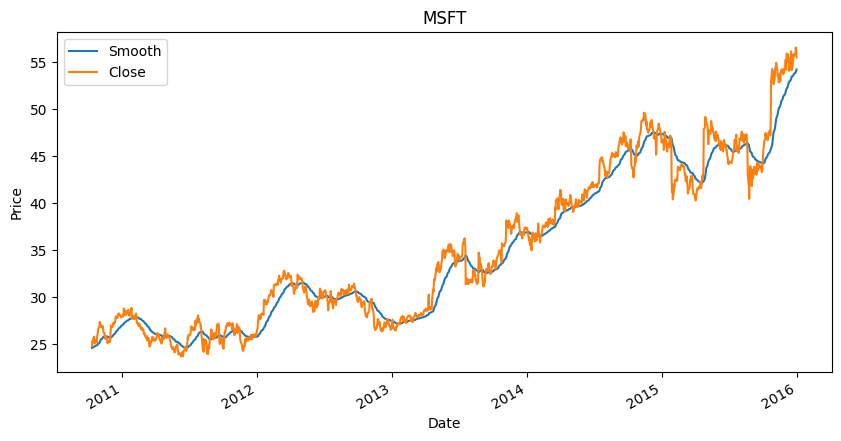

In [ ]:
# Smoothing
alpha = 0.05
df['Smooth'] = np.nan

df.iloc[0, df.columns.get_loc('Smooth')] = df.iloc[0, df.columns.get_loc('Close')]

for i in range(1, df.shape[0]):
    df.iloc[i, df.columns.get_loc('Smooth')] = alpha * df.iloc[i-1, df.columns.get_loc('Close')] + (1 - alpha) * df.iloc[i-1, df.columns.get_loc('Smooth')]
plt.figure(figsize=(10,5))
df.loc["2010-10-12":"2015-12-31", ['Smooth']].plot(ax=plt.gca())
df.loc["2010-10-12":"2015-12-31", ['Close']].plot(ax=plt.gca())
plt.title("MSFT")
plt.ylabel("Price")
plt.show()

In [ ]:
model = LogisticRegression()
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_prd = model.predict(X)

In [ ]:
y_prd

array([ 1,  1,  1, ..., -1,  1, -1])

In [ ]:
df['start_Logistic'] = y_prd * df['returns']
np.exp(df[['returns', 'start_Logistic']].sum())

returns           12.422861
start_Logistic    27.456707
dtype: float64

<Axes: xlabel='Date'>

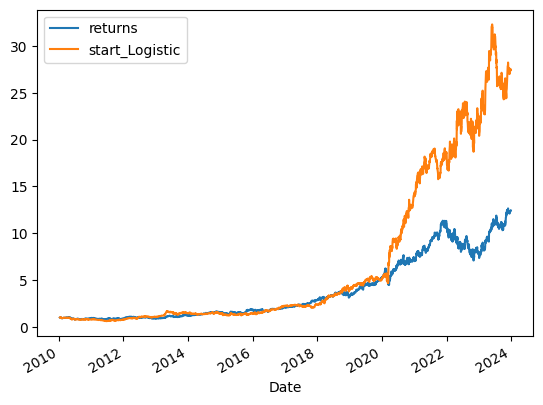

In [ ]:
np.exp(df[['returns', 'start_Logistic']].cumsum()).plot()

In [ ]:
metrics.confusion_matrix(y, y_prd)

array([[ 452, 1237],
       [ 425, 1402]])

In [ ]:
print(metrics.classification_report(y, y_prd))

              precision    recall  f1-score   support

          -1       0.52      0.27      0.35      1689
           1       0.53      0.77      0.63      1827

    accuracy                           0.53      3516
   macro avg       0.52      0.52      0.49      3516
weighted avg       0.52      0.53      0.50      3516



Train, Test Split


In [ ]:
train, test = train_test_split(df, shuffle = False, test_size = 0.3, random_state = 42)

In [ ]:
X_train, y_train = train[dirnames], train[['direction']]

In [ ]:
X_test, y_test = test[dirnames], test[['direction']]

In [ ]:
model_split = LogisticRegression()

In [ ]:
model_split.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
test['strat_Logistic'] = y_pred * test['returns']

In [ ]:
np.exp(test[['returns', 'strat_Logistic']].sum())

returns           2.716463
strat_Logistic    5.424463
dtype: float64

In [ ]:
(test['direction'].diff() != 0).value_counts()

direction
True     546
False    509
Name: count, dtype: int64

<Axes: xlabel='Date'>

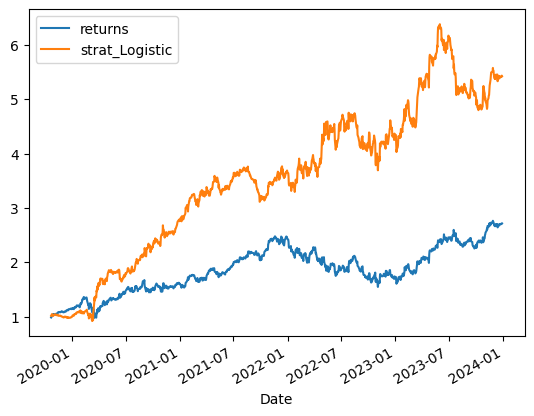

In [ ]:
np.exp(test[['returns', 'strat_Logistic']].cumsum()).plot()

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[142, 354],
       [137, 422]])

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.51      0.29      0.37       496
           1       0.54      0.75      0.63       559

    accuracy                           0.53      1055
   macro avg       0.53      0.52      0.50      1055
weighted avg       0.53      0.53      0.51      1055



Test on other dataset (AAPL)


In [ ]:
df_new =  yf.download('AAPL', start = '2010-01-01', end = '2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df_new['returns'] = np.log(df_new.Close.pct_change()+1)

In [ ]:
df_new['direction'] = [1 if i > 0 else -1 for i in df_new.returns]

In [ ]:
dirnames_new = lagit(df_new, 5)

In [ ]:
df_new.dropna(inplace = True)

In [ ]:
X_new = df_new[dirnames_new]
y_new = df_new[['direction']]

In [ ]:
y_pred_new = model_split.predict(X_new)

In [ ]:
metrics.confusion_matrix(y_new, y_pred_new)

array([[ 536, 1125],
       [ 608, 1247]])

In [ ]:
print(metrics.classification_report(y_new, y_pred_new))

              precision    recall  f1-score   support

          -1       0.47      0.32      0.38      1661
           1       0.53      0.67      0.59      1855

    accuracy                           0.51      3516
   macro avg       0.50      0.50      0.49      3516
weighted avg       0.50      0.51      0.49      3516

